Available features: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']

Training set shape: (455, 1)
Testing set shape: (114, 1)


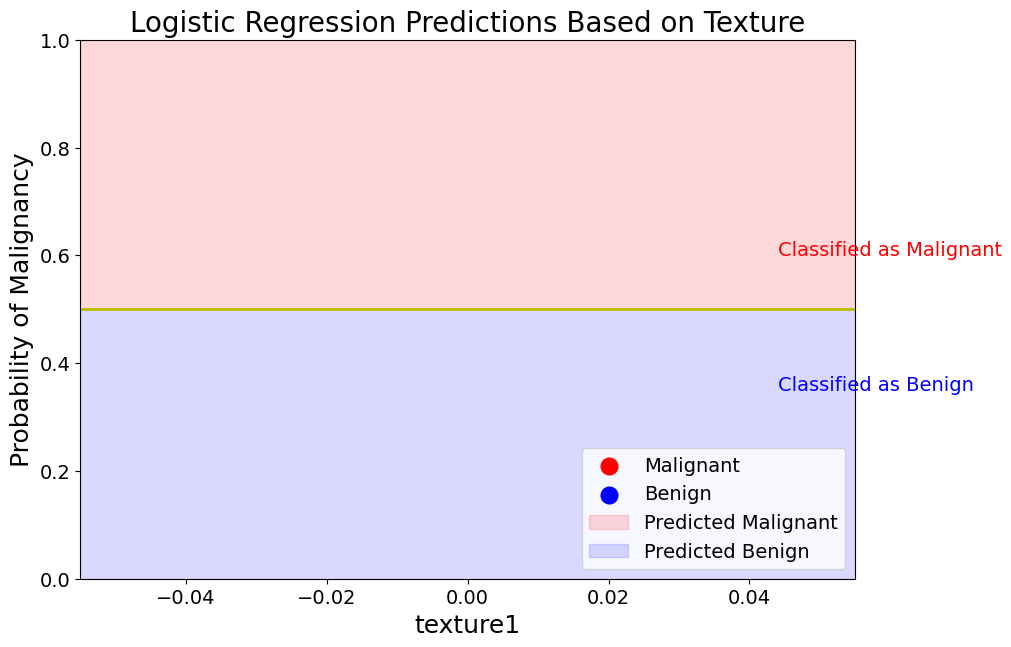


Model Performance Summary:
--------------------------------------------------
Total samples: 569
Training samples: 455
Testing samples: 114
Target distribution in training set:
Diagnosis
B    285
M    170
Name: count, dtype: int64

Model Accuracy: 0.7105263157894737

Classification Report:
              precision    recall  f1-score   support

           B       0.71      0.90      0.80        72
           M       0.70      0.38      0.49        42

    accuracy                           0.71       114
   macro avg       0.70      0.64      0.64       114
weighted avg       0.71      0.71      0.69       114



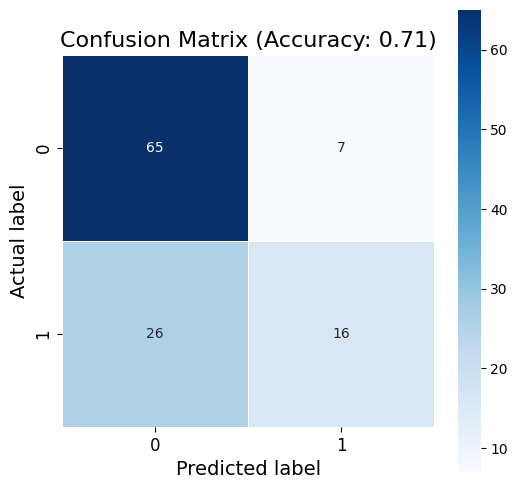

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo

# Fetch Breast Cancer Wisconsin (Diagnostic) dataset
dataset = fetch_ucirepo(id=17) 
X = dataset.data.features 
y = dataset.data.targets 

# Print column names to verify
print("Available features:", X.columns.tolist())

# We'll focus on texture as our feature
X = X[['texture1']]  # Using 'texture' instead of 'texture_mean'

# Convert target to binary (0 for benign, 1 for malignant)
y = y['Diagnosis']  # The target is already numeric in this dataset

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Scale the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Get predictions
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Create visualization dataset
example_df = X_test.copy()
example_df['Diagnosis'] = y_test.values
example_df['logistic_preds'] = y_probs

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 7))

# Define filters for target classes
malignantFilter = example_df['Diagnosis'] == 1
benignFilter = example_df['Diagnosis'] == 0

# Scatter plot for each class
ax.scatter(example_df.loc[malignantFilter, 'texture1'].values,
          example_df.loc[malignantFilter, 'logistic_preds'].values,
          color='r',
          s=100,
          label='Malignant')

ax.scatter(example_df.loc[benignFilter, 'texture1'].values,
          example_df.loc[benignFilter, 'logistic_preds'].values,
          color='b',
          s=100,
          label='Benign')

ax.axhline(y=0.5, c='y', linewidth=2)

ax.axhspan(0.5, 1, alpha=0.15, color='red', label="Predicted Malignant")
ax.axhspan(0, 0.5, alpha=0.15, color='blue', label="Predicted Benign")

ax.text(ax.get_xlim()[1] * 0.8, 0.6, 'Classified as Malignant', fontsize=14, color='red')
ax.text(ax.get_xlim()[1] * 0.8, 0.35, 'Classified as Benign', fontsize=14, color='blue')

ax.set_ylim(0, 1)
ax.set_xlabel('texture1', fontsize=18)
ax.set_ylabel('Probability of Malignancy', fontsize=18)
ax.set_title('Logistic Regression Predictions Based on Texture', fontsize=20)
ax.legend(loc='lower right', markerscale=1.2, fontsize=14)
ax.tick_params(labelsize=14)

plt.show()

# Print model performance metrics
print("\nModel Performance Summary:")
print("-" * 50)
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Target distribution in training set:\n{pd.Series(y_train).value_counts()}")

score = model.score(X_test_scaled, y_test)
print("\nModel Accuracy:", score)

print("\nClassification Report:")
print(metrics.classification_report(y_test, model.predict(X_test_scaled)))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, model.predict(X_test_scaled))
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')

plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.title(f'Confusion Matrix (Accuracy: {score:.2f})', fontsize=16)
plt.tick_params(labelsize=12)
plt.show()

Available features: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
Texture-related columns found: ['texture1', 'texture2', 'texture3']

Unique values in y before conversion: ['M' 'B']

Training set shape: (455, 1)
Testing set shape: (114, 1)

Example DataFrame Preview:
     texture1  Diagnosis  logistic_preds
120     10.82          0        0.070407
250     23.56          1        0.590178
375     16.07          0        0.203139
99      19.77          1        0.374855
455     30.72          0        0.882871

Number of malignant cases: 42
Number of benign cases: 72


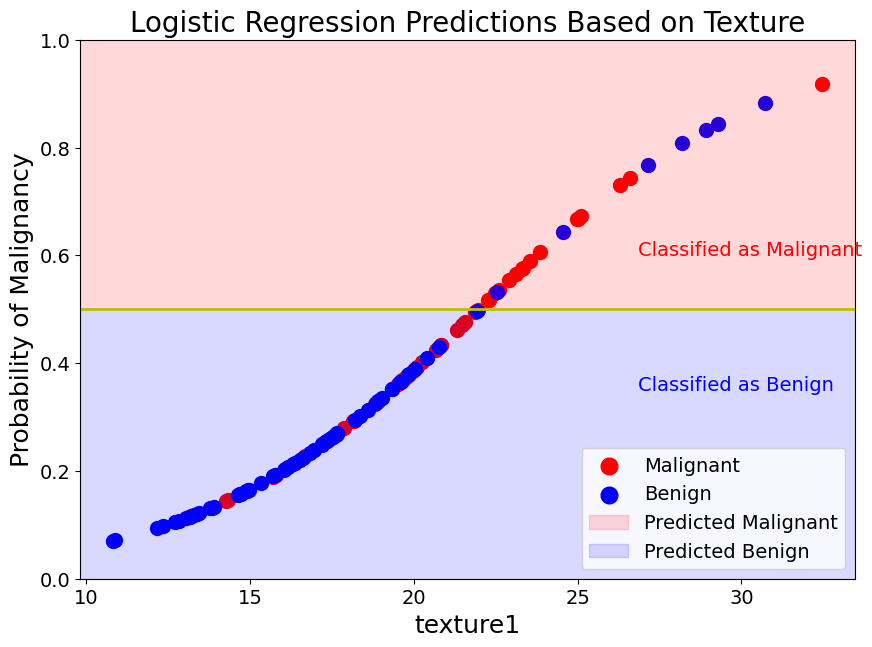


Model Performance Summary:
--------------------------------------------------
Total samples: 569
Training samples: 455
Testing samples: 114
Target distribution in training set:
Diagnosis
0    285
1    170
Name: count, dtype: int64

Model Accuracy: 0.7105263157894737

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.80        72
           1       0.70      0.38      0.49        42

    accuracy                           0.71       114
   macro avg       0.70      0.64      0.64       114
weighted avg       0.71      0.71      0.69       114



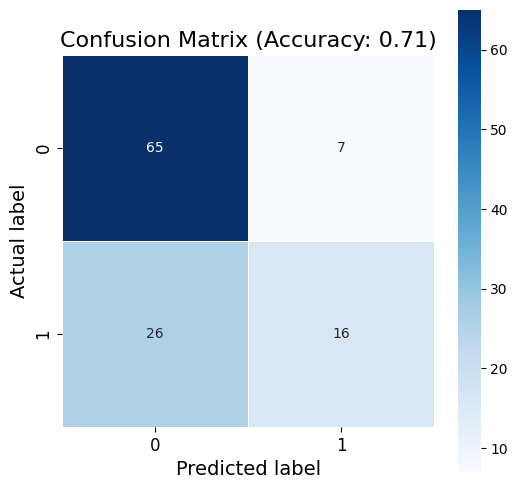

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from ucimlrepo import fetch_ucirepo

# Fetch Breast Cancer Wisconsin (Diagnostic) dataset
dataset = fetch_ucirepo(id=17) 
X = dataset.data.features 
y = dataset.data.targets 

# Print available features
print("Available features:", X.columns.tolist())

# Find texture-related columns if texture1 does not exist
texture_columns = [col for col in X.columns if 'texture' in col.lower()]
print("Texture-related columns found:", texture_columns)

# Use the correct texture column (default to 'texture_mean' if available)
if 'texture_mean' in X.columns:
    texture_feature = 'texture_mean'
else:
    texture_feature = texture_columns[0]  # Take the first match

X = X[[texture_feature]]  # Use the correct column

# Ensure target variable is in binary format (0 = benign, 1 = malignant)
print("\nUnique values in y before conversion:", y['Diagnosis'].unique())
y = y['Diagnosis'].map({'B': 0, 'M': 1})  # Convert 'B' (benign) to 0, 'M' (malignant) to 1

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# Scale the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Get predictions
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Create visualization dataset
example_df = X_test.copy()
example_df['Diagnosis'] = y_test.values
example_df['logistic_preds'] = y_probs

# Check if example_df is empty
print("\nExample DataFrame Preview:")
print(example_df.head())

# Define filters for target classes
malignantFilter = example_df['Diagnosis'] == 1
benignFilter = example_df['Diagnosis'] == 0

# Ensure we have data points
print("\nNumber of malignant cases:", sum(malignantFilter))
print("Number of benign cases:", sum(benignFilter))

# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(example_df.loc[malignantFilter, texture_feature].values,
          example_df.loc[malignantFilter, 'logistic_preds'].values,
          color='r',
          s=100,
          label='Malignant')

ax.scatter(example_df.loc[benignFilter, texture_feature].values,
          example_df.loc[benignFilter, 'logistic_preds'].values,
          color='b',
          s=100,
          label='Benign')

ax.axhline(y=0.5, c='y', linewidth=2)
ax.axhspan(0.5, 1, alpha=0.15, color='red', label="Predicted Malignant")
ax.axhspan(0, 0.5, alpha=0.15, color='blue', label="Predicted Benign")

ax.text(ax.get_xlim()[1] * 0.8, 0.6, 'Classified as Malignant', fontsize=14, color='red')
ax.text(ax.get_xlim()[1] * 0.8, 0.35, 'Classified as Benign', fontsize=14, color='blue')

# Adjust x-axis limits to ensure visibility of all points
ax.set_xlim(example_df[texture_feature].min() - 1, example_df[texture_feature].max() + 1)
ax.set_ylim(0, 1)

ax.set_xlabel(texture_feature, fontsize=18)
ax.set_ylabel('Probability of Malignancy', fontsize=18)
ax.set_title('Logistic Regression Predictions Based on Texture', fontsize=20)
ax.legend(loc='lower right', markerscale=1.2, fontsize=14)
ax.tick_params(labelsize=14)

plt.show()

# Print model performance metrics
print("\nModel Performance Summary:")
print("-" * 50)
print(f"Total samples: {len(X)}")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Target distribution in training set:\n{pd.Series(y_train).value_counts()}")

score = model.score(X_test_scaled, y_test)
print("\nModel Accuracy:", score)

print("\nClassification Report:")
print(metrics.classification_report(y_test, model.predict(X_test_scaled)))

# Plot confusion matrix
cm = metrics.confusion_matrix(y_test, model.predict(X_test_scaled))
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues')

plt.ylabel('Actual label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.title(f'Confusion Matrix (Accuracy: {score:.2f})', fontsize=16)
plt.tick_params(labelsize=12)
plt.show()
